In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 999
import matplotlib

/Users/matevaradi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
plt.rcParams["figure.figsize"] = [6.3, 3]
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-paper')
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

# Click behavior

In [ ]:
clicks=pd.read_csv("Observations_Report.csv",sep=";")

## What can we say about the (average) user?

In [7]:
#group clicks by users
clicks_per_user=clicks[['USERID','OFFERID','CLICK']].groupby(['USERID']).sum()
n_u=len(clicks_per_user) #number of users

clickthrough_per_user=clicks[['USERID','CLICK']].groupby(['USERID']).apply(lambda x: x.sum() / x.count())

In [10]:
print (len(clicks_per_user[clicks_per_user["CLICK"]==0])/n_u*100)
print (len(clicks_per_user[clicks_per_user["CLICK"]==1])/n_u*100) 
print (len(clicks_per_user[clicks_per_user["CLICK"]>1])/n_u*100) 

print (np.median(clicks_per_user["CLICK"]) )
print (np.mean(clicks_per_user["CLICK"]))
print (max(clicks_per_user["CLICK"]))



72.34383611361284
9.479386501418144
18.176777384969014
0.0
2.3701557942279514
848


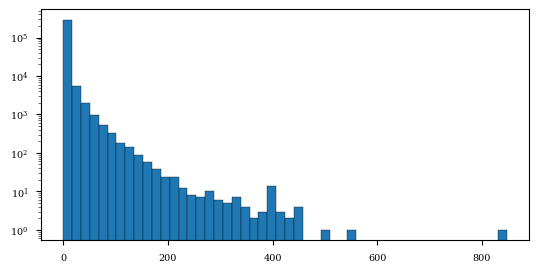

In [80]:
#len(clicks_per_user[clicks_per_user["CLICK"]>5])/n_u
f=plt.hist(clicks_per_user["CLICK"],bins=50,edgecolor='black',log=True)
plt.show()

#### The average number of clicks a user is made is 2.47. However, this is caused by some users that click on many offers (the maximum is 848) and hence the median of the clicks is actually 0. 72% of users haven't clicked on any of the offers. 9.5% clicked on one offer and 18% clicked on more than one offer. 

In [174]:
print (np.mean(clickthrough_per_user["CLICK"]))
print (np.median(clickthrough_per_user["CLICK"]))
print (max(clickthrough_per_user["CLICK"]))
print (min(clickthrough_per_user["CLICK"]))

0.0161508752933
0.0
1.0
0.0


#### The average clickthrough rate of users is 1.6%, while the median is 0%. The maximum clickthrough rate is 100%, so there are users that actually click on all the offers they receive.

In [11]:
#group offers by users
offers_per_user=clicks[['USERID','CLICK']].groupby(['USERID']).count()

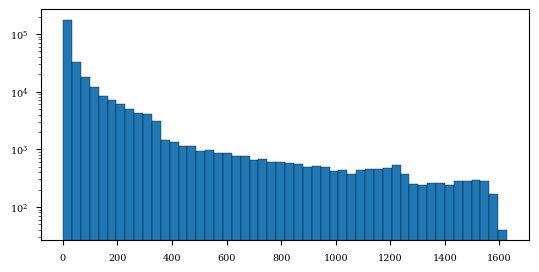

In [17]:
f =plt.hist(offers_per_user["CLICK"],bins=50,edgecolor='black',log=True) 
plt.show()

In [134]:
print (np.mean(offers_per_user["CLICK"]))
print (np.median(offers_per_user["CLICK"]))
print (max(offers_per_user["CLICK"]))

print (len(offers_per_user[offers_per_user["CLICK"]<5])/n_u)

108.118445284
19.0
1628
0.189644859059


#### Users received (by receive we mean that they opened a mail with that offer) 108 offers on average, the median was 19. Approximately 19% of the users received less than 5 offers.  

In [ ]:
clickdata=pd.DataFrame(np.transpose(clicks_per_user["CLICK"]))
clickdata["CLICKTHROUGH"]=clickthrough_per_user["CLICK"]
clickdata["SEEN"]=offers_per_user["CLICK"]

In [71]:
len(clickdata[(clickdata["CLICK"]>1) & (clickdata["SEEN"]>100)])

37942

In [12]:
#group mails by user
mails_per_user=clicks[['USERID','MAILID']].groupby('USERID')['MAILID'].nunique()

In [150]:
print (np.mean(mails_per_user))
print (np.median(mails_per_user))
print (max(mails_per_user))

40.4332497681
6.0
622


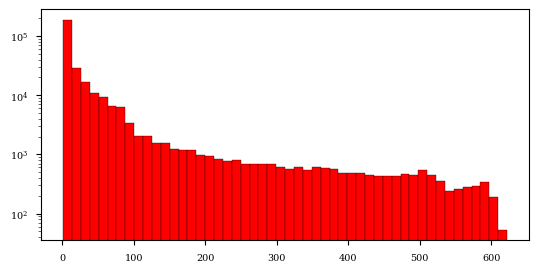

In [24]:
f =plt.hist(mails_per_user,bins=50,edgecolor='black',log=True,color="#db0933") 
plt.show()

#### The mean number of opened mails per user is 40, the median is 6. The maximum is 622. 

## What do we know about the mails?

In [19]:
#group clicks by mails
clicks_per_mail=clicks[['MAILID','CLICK']].groupby(['MAILID']).sum()
n_m=len(clicks_per_mail) #number of mails

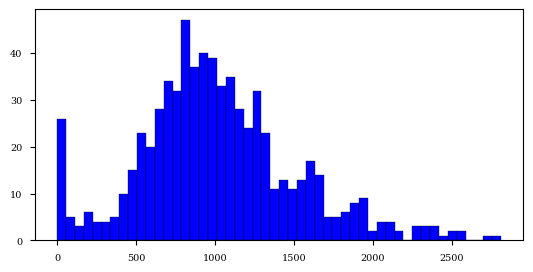

In [27]:
f =plt.hist(clicks_per_mail["CLICK"],bins=50,edgecolor='black') 
plt.show()

In [157]:
#group offers by mails
offers_per_mail=clicks[['MAILID','USERID','CLICK']].groupby(['MAILID','USERID']).count()
print (np.mean(offers_per_mail["CLICK"]))
print (np.median(offers_per_mail["CLICK"]))
print (max(offers_per_mail["CLICK"]))

2.6739984024
2.0
10


#### The average mail contains 2.67 offers. The most offers a single mail has is 10.

## What about the offers?

In [25]:
#group clicks by offers:
clicks_per_offer=clicks[['OFFERID','CLICK']].groupby(['OFFERID']).sum()
#clickthrough per offer:
clickthrough_per_offer=clicks[['OFFERID','CLICK']].groupby(['OFFERID']).apply(lambda x: x.sum() / x.count())

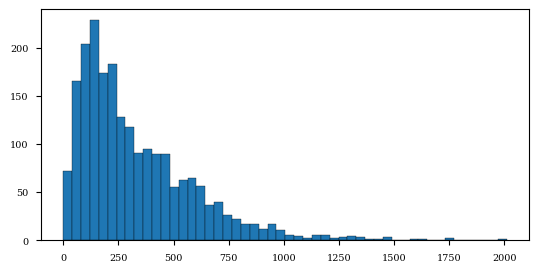

In [26]:
f =plt.hist(clicks_per_offer["CLICK"],bins=50,edgecolor='black') 
plt.show()

In [175]:
print (len(clicks[clicks["CLICK"]==1])/len(clicks))
print (np.mean(clickthrough_per_offer["CLICK"]))
print (np.median(clickthrough_per_offer["CLICK"]))
print (max(clickthrough_per_offer["CLICK"]))
print (max(clickthrough_per_offer["CLICK"]))
print (min(clickthrough_per_offer["CLICK"]))
print (np.std(clickthrough_per_offer["CLICK"]))

#clicks[clicks["OFFERID"].isin(clickthrough_per_offer[clickthrough_per_offer["CLICK"]==1]["OFFERID"])]

0.0219218449544
0.0291027056551
0.018808839382
1.0
0.0
0.0759606373897


#### Average click-through rate in the whole dataset is 2.19%. The average clickthrough per offer is 2.9%. The maximum clickthrough rate is 100%, but this is because some offers are only sent out once.  

### other analyses

In [207]:
duplicates=clicks[clicks[["USERID","OFFERID"]].duplicated()]

In [210]:
#clicks is the original click dataframe
duplicates=clicks[clicks[["USERID","OFFERID"]].duplicated()]
#Removing the duplicates (getting rid of the second occurence)
clicks_with_dupes=clicks
clicks=pd.concat([clicks_with_dupes,duplicates]).drop_duplicates(keep=False)


In [218]:
userids=sorted(clicks["USERID"].unique())
offerids=sorted(clicks["OFFERID"].unique())

# Offers

In [138]:
offers=pd.read_excel("OfferDetails_neat.xlsx")
offers_clean=pd.read_csv("offers_clean.csv")

In [43]:
offers.head()

,MAILID,OFFERID,OFFER_VISUALISATION,OFFER_POSITION,COUNTRY_NAME,REGION_NAME,CITY_NAME,ACCOMMODATION_NAME,REVIEW_RATING,USP1,USP2,USP3,ROOM_OCCUPANCY,DURATION,DEPARTURE_DATE,PRICE,PRICE_ORIGINAL,MEAL_PLAN,ROOMTYPE,STAR_RATING
0,14128,23221,06 - Acco half width,7,Bulgaria,Zwarte Zeekust Varna,Golden Sands,Hotel Excelsior,0,Familiehotel,Shuttle busje naar het centrum,"All inclusive, wel zo makkelijk",3 Pers.,8,Jul 18 2018 12:00AM,664,749.0,All inclusive,2-persoonskamer type A,4
1,14128,23222,06 - Acco half width,6,Spain,Andalusi√´ - Costa de Almer√≠a,Roquetas de Mar,Hotel Zoraida Resort,8.1,Shows met professionele artiesten,Mooie comfortabele kamers,Zwemparadijs met glijbanen,"4 Pers., 3 Volw., 2 K",8,Jul 14 2018 12:00AM,919,1039.0,All inclusive,2-persoonskamer bergzicht type A,4
2,14128,23223,06 - Acco half width,5,Greece,Karpathos,Karpathos-Stad,App. Three Stars,0,Volledig gerenoveerd,Gemoedelijk en kleinschalig,Strand op loopafstand,2 Pers.,8,Jul 17 2018 12:00AM,749,749.0,Logies,2-kamerappartement,3
3,14128,23224,06 - Acco half width,4,Turkey,Turkse Rivi√®ra,Side,Xperience Club Nena,8.2,Origineel Xperience animatieprogramma,Sfeervol en ruim opgezet,7 waterglijbanen,"3 Pers., Max 2 Volw.",8,Jul 14 2018 12:00AM,774,919.0,All inclusive,2-persoonskamer voordeeltarief,5
4,14435,24058,06 - Acco half width,9,Spain,Andalusi√´ - Costa de Almer√≠a,Roquetas de Mar,Hotel Zoraida Resort,8.1,Shows met professionele artiesten,Mooie comfortabele kamers,Zwemparadijs met glijbanen,"4 Pers., 3 Volw., 2 K",8,Jun 12 2018 12:00AM,519,589.0,All inclusive,2-persoonskamer bergzicht type A,4


In [101]:
offers_clean.head()

,MAILID,OFFERID,OFFER_VISUALISATION,OFFER_POSITION,REGION_NAME,CITY_NAME,ACCOMMODATION_NAME,REVIEW_RATING,USP1,USP2,USP3,ROOM_OCCUPANCY,DURATION,DEPARTURE_DATE,PRICE,PRICE_ORIGINAL,ROOMTYPE,STAR_RATING,COUNTRY_NAME_Bulgarije,COUNTRY_NAME_Cyprus,COUNTRY_NAME_Egypte,COUNTRY_NAME_Griekenland,COUNTRY_NAME_Israel,COUNTRY_NAME_Italie,COUNTRY_NAME_Kaapverdie,COUNTRY_NAME_Kroatie,COUNTRY_NAME_Malta,COUNTRY_NAME_Marokko,COUNTRY_NAME_Montenegro,COUNTRY_NAME_Portugal,COUNTRY_NAME_Spanje,COUNTRY_NAME_Tunesie,COUNTRY_NAME_Turkije,COUNTRY_NAME_Verenigde Arabische Emiraten,DISCOUNT,MEAL_PLAN_all inclusive,MEAL_PLAN_halfpension,MEAL_PLAN_logies,MEAL_PLAN_logies en ontbijt,MEAL_PLAN_ultra all inclusive,MEAL_PLAN_volpension,MEAL_PLAN_ord,HALFWIDTH,CHILDREN,ROOMS,DEPARTURE_FEBRUARY,DEPARTURE_MARCH,DEPARTURE_APRIL,DEPARTURE_MAY,DEPARTURE_JUNE,DEPARTURE_JULY,DEPARTURE_AUGUST,DEPARTURE_SEPTEMBER,DEPARTURE_OCTOBER,DEPARTURE_NOVEMBER,DEPARTURE_DECEMBER,MAILMONTH,MAIL_FEBRUARY,MAIL_MARCH,MAIL_APRIL,MAIL_MAY,MAIL_JUNE,MAIL_JULY,MAIL_AUGUST,MAIL_SEPTEMBER,MAIL_OCTOBER,MAIL_NOVEMBER,MAIL_DECEMBER,DEPARTURE_MONTH
0,14128.0,23221.0,06 - Acco half width,7,Zwarte Zeekust Varna,Golden Sands,Hotel Excelsior,8.04,Familiehotel,Shuttle busje naar het centrum,"All inclusive, wel zo makkelijk",3 Pers.,8.0,Jul 18 2018 12:00AM,664.0,749.0,2-persoonskamer type A,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.113485,1,0,0,0,0,0,4,1,0,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7
1,14128.0,23222.0,06 - Acco half width,6,Andalusi√´ - Costa de Almer√≠a,Roquetas de Mar,Hotel Zoraida Resort,8.10,Shows met professionele artiesten,Mooie comfortabele kamers,Zwemparadijs met glijbanen,"4 Pers., 3 Volw., 2 K",8.0,Jul 14 2018 12:00AM,919.0,1039.0,2-persoonskamer bergzicht type A,4.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.115496,1,0,0,0,0,0,4,1,0,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7
2,14128.0,23223.0,06 - Acco half width,5,Karpathos,Karpathos-Stad,App. Three Stars,8.08,Volledig gerenoveerd,Gemoedelijk en kleinschalig,Strand op loopafstand,2 Pers.,8.0,Jul 17 2018 12:00AM,749.0,749.0,2-kamerappartement,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,1,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7
3,14128.0,23224.0,06 - Acco half width,4,Turkse Rivi√®ra,Side,Xperience Club Nena,8.20,Origineel Xperience animatieprogramma,Sfeervol en ruim opgezet,7 waterglijbanen,"3 Pers., Max 2 Volw.",8.0,Jul 14 2018 12:00AM,774.0,919.0,2-persoonskamer voordeeltarief,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.157780,1,0,0,0,0,0,4,1,0,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7
4,14435.0,24058.0,06 - Acco half width,9,Andalusi√´ - Costa de Almer√≠a,Roquetas de Mar,Hotel Zoraida Resort,8.10,Shows met professionele artiesten,Mooie comfortabele kamers,Zwemparadijs met glijbanen,"4 Pers., 3 Volw., 2 K",8.0,Jun 12 2018 12:00AM,519.0,589.0,2-persoonskamer bergzicht type A,4.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.118846,1,0,0,0,0,0,4,1,0,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6


### Destination country

In [36]:
# Some cleaning
offers.loc[offers["COUNTRY_NAME"].apply( lambda x: x[0:4]=="Tune" ),"COUNTRY_NAME"]='Tunesie'
offers.loc[offers["COUNTRY_NAME"].apply( lambda x: x[0:4]=="Isra" ),"COUNTRY_NAME"]='Israel'
offers.loc[offers["COUNTRY_NAME"].apply( lambda x: x[0:4]=="Ital" ),"COUNTRY_NAME"]='Italie'
offers.loc[offers["COUNTRY_NAME"].apply( lambda x: x[0:4]=="Kroa" ),"COUNTRY_NAME"]='Kroatie'
offers.loc[offers["COUNTRY_NAME"].apply( lambda x: x[0:4]=="Kaap" ),"COUNTRY_NAME"]='Kaapverdie'
offers.loc[offers["COUNTRY_NAME"].apply( lambda x: x=="Egypte " ),"COUNTRY_NAME"]="Egypte"
offers.loc[offers["COUNTRY_NAME"].apply( lambda x: x=="Spanje " ),"COUNTRY_NAME"]="Spanje"
offers.loc[offers["COUNTRY_NAME"].apply( lambda x: x=="Costa del Sol" ),"COUNTRY_NAME"]="Spanje"
offers.loc[offers["COUNTRY_NAME"].apply( lambda x: x=="Roda" ),"COUNTRY_NAME"]="Griekenland"

# Displaying english names
x=offers["COUNTRY_NAME"].unique()
y=np.array(["Bulgaria","Spain","Greece","Turkey","Portugal","Cyprus","Egypt","Croatia","Tunisia","Montenegro",\
 "Cape Verde","Malta","Italy","UAE","Morocco","Israel"])
for i,j in zip(x,y):
    offers["COUNTRY_NAME"]=offers["COUNTRY_NAME"].replace(i,j)

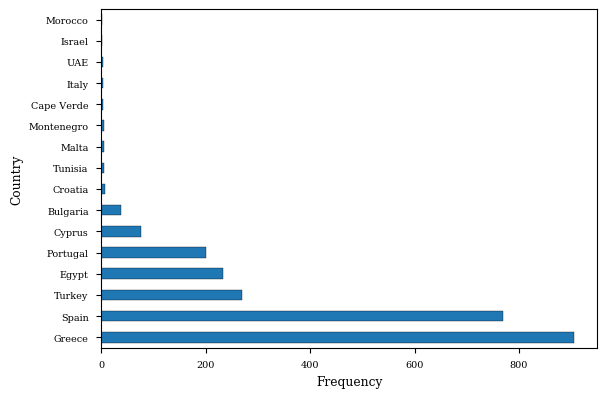

In [119]:
#"Number of offers per destination country"
ax = offers["COUNTRY_NAME"].value_counts().plot(kind='barh',edgecolor='black')
ax.set_ylabel("Country")
ax.set_xlabel("Frequency")
plt.show()

### Mail and departure dates

In [99]:
# Some data cleaning
offers_clean = offers_clean.dropna(subset=['MAILMONTH'])

offers_clean["DEPARTURE_MONTH"]=offers_clean["DEPARTURE_DATE"].apply(lambda x: 2 if ("feb" in str(x).lower() ) else
 3 if ("mar" in str(x).lower() ) else 
4 if ("apr" in str(x).lower() )  else
 5 if ("may" in str(x).lower()  ) else
6 if ("jun" in str(x).lower()  ) else
7 if ("jul" in str(x).lower() ) else
8 if ("aug" in str(x).lower()  ) else
9 if ("sep" in str(x).lower()  ) else
10 if ("oct" in str(x).lower()  ) else
11 if ("nov" in str(x).lower()  ) else
12 if ("dec" in str(x).lower()  ) else 1)

offers_clean["MAILMONTH"]=offers_clean["MAILMONTH"].apply(lambda x: int(x))

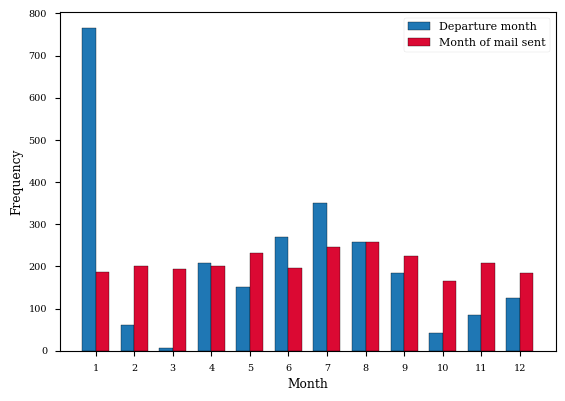

In [122]:
labels = [str(x) for x in list(range(1,13))]
depm=offers_clean["DEPARTURE_MONTH"].value_counts().sort_index().values
mailm=offers_clean["MAILMONTH"].value_counts().sort_index().values

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, depm, width, label='Departure month',edgecolor='black')
rects2 = ax.bar(x + width/2, mailm, width, label='Month of mail sent',color="#db0933",edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_xlabel('Month')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

### Other information on offers


#### Prices and discounts

In [141]:
print("Average original price :", offers["PRICE_ORIGINAL"].mean())
print("Standard deviation of price: ", offers["PRICE_ORIGINAL"].std())
print("Proportion of discounted offers: ",len(offers_clean[offers_clean["DISCOUNT"]>0])/len(offers_clean) )
print("Average discount: ",offers_clean["DISCOUNT"].mean() )

Average original price : 684.2001703577513
Standard deviation of price:  219.52088271115656
Proportion of discounted offers:  0.9703205381875742
Average discount:  0.2761612883621037


In [139]:
len(offers_clean[offers_clean["DISCOUNT"]>0])/len(offers_clean)

0.9703205381875742

#### Average review rating and stars

In [145]:
print("Average review rating:", offers_clean["REVIEW_RATING"].mean())
print("Average star number:", offers_clean["STAR_RATING"].mean())

Average review rating: 8.110692520775617
Average star number: 3.8407202216066483


#### Meal plan frequency

In [147]:
offers_clean["MEAL_PLAN_ord"].value_counts().sort_index()
# 0: no food included
# 1: bed and breakfast
# 2: half pension
# 3: full pension
# 4: all inclusive
# 5: ultra all inclusive

0     877
1     242
2     154
3       1
4    1102
5     151
Name: MEAL_PLAN_ord, dtype: int64